In [2]:
import pandas as pd

In [3]:
file_path = './dataset/Clean_Dataset.csv'

In [4]:
df = pd.read_csv(file_path)

In [5]:
df

,Unnamed: 0,airline,flight,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left,price
0,0,SpiceJet,SG-8709,Delhi,Evening,zero,Night,Mumbai,Economy,2.17,1,5953
1,1,SpiceJet,SG-8157,Delhi,Early_Morning,zero,Morning,Mumbai,Economy,2.33,1,5953
2,2,AirAsia,I5-764,Delhi,Early_Morning,zero,Early_Morning,Mumbai,Economy,2.17,1,5956
3,3,Vistara,UK-995,Delhi,Morning,zero,Afternoon,Mumbai,Economy,2.25,1,5955
4,4,Vistara,UK-963,Delhi,Morning,zero,Morning,Mumbai,Economy,2.33,1,5955
...,...,...,...,...,...,...,...,...,...,...,...,...
300148,300148,Vistara,UK-822,Chennai,Morning,one,Evening,Hyderabad,Business,10.08,49,69265
300149,300149,Vistara,UK-826,Chennai,Afternoon,one,Night,Hyderabad,Business,10.42,49,77105
300150,300150,Vistara,UK-832,Chennai,Early_Morning,one,Night,Hyderabad,Business,13.83,49,79099
300151,300151,Vistara,UK-828,Chennai,Early_Morning,one,Evening,Hyderabad,Business,10.00,49,81585


In [6]:
df.airline.value_counts()

airline
Vistara      127859
Air_India     80892
Indigo        43120
GO_FIRST      23173
AirAsia       16098
SpiceJet       9011
Name: count, dtype: int64

In [7]:
df.source_city.value_counts()

source_city
Delhi        61343
Mumbai       60896
Bangalore    52061
Kolkata      46347
Hyderabad    40806
Chennai      38700
Name: count, dtype: int64

In [8]:
df.destination_city.value_counts()

destination_city
Mumbai       59097
Delhi        57360
Bangalore    51068
Kolkata      49534
Hyderabad    42726
Chennai      40368
Name: count, dtype: int64

In [9]:
df.departure_time.value_counts()

departure_time
Morning          71146
Early_Morning    66790
Evening          65102
Night            48015
Afternoon        47794
Late_Night        1306
Name: count, dtype: int64

In [10]:
df.arrival_time.value_counts()

arrival_time
Night            91538
Evening          78323
Morning          62735
Afternoon        38139
Early_Morning    15417
Late_Night       14001
Name: count, dtype: int64

In [11]:
df.stops.value_counts()

stops
one            250863
zero            36004
two_or_more     13286
Name: count, dtype: int64

In [12]:
df['class'].value_counts()

class
Economy     206666
Business     93487
Name: count, dtype: int64

In [13]:
df['duration'].value_counts()

duration
2.17     4242
2.25     4036
2.75     2879
2.08     2755
2.83     2323
         ... 
37.17       1
38.75       1
38.50       1
36.25       1
41.50       1
Name: count, Length: 476, dtype: int64

In [14]:
df['duration'].min()

0.83

In [15]:
df['duration'].max()

49.83

In [16]:
df['duration'].median()

11.25

## Preprocessing

In [18]:
df = df.drop('Unnamed: 0', axis=1)
df = df.drop('flight', axis=1)

In [19]:
df['class'] = df['class'].apply(lambda x: 1 if x == 'Business' else 0)

In [20]:
df

,airline,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left,price
0,SpiceJet,Delhi,Evening,zero,Night,Mumbai,0,2.17,1,5953
1,SpiceJet,Delhi,Early_Morning,zero,Morning,Mumbai,0,2.33,1,5953
2,AirAsia,Delhi,Early_Morning,zero,Early_Morning,Mumbai,0,2.17,1,5956
3,Vistara,Delhi,Morning,zero,Afternoon,Mumbai,0,2.25,1,5955
4,Vistara,Delhi,Morning,zero,Morning,Mumbai,0,2.33,1,5955
...,...,...,...,...,...,...,...,...,...,...
300148,Vistara,Chennai,Morning,one,Evening,Hyderabad,1,10.08,49,69265
300149,Vistara,Chennai,Afternoon,one,Night,Hyderabad,1,10.42,49,77105
300150,Vistara,Chennai,Early_Morning,one,Night,Hyderabad,1,13.83,49,79099
300151,Vistara,Chennai,Early_Morning,one,Evening,Hyderabad,1,10.00,49,81585


In [21]:
df.stops = pd.factorize(df.stops)[0]

In [22]:
df = df.join(pd.get_dummies(df.airline, prefix='airline')).drop('airline', axis=1)
df = df.join(pd.get_dummies(df.source_city, prefix='source')).drop('source_city', axis=1)
df = df.join(pd.get_dummies(df.destination_city, prefix='dest')).drop('destination_city', axis=1)
df = df.join(pd.get_dummies(df.arrival_time, prefix='arrival')).drop('arrival_time', axis=1)
df = df.join(pd.get_dummies(df.departure_time, prefix='departure')).drop('departure_time', axis=1)

## Training Regression Model

In [24]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor

In [25]:
X, y = df.drop('price', axis = 1), df.price

In [26]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2)

In [27]:
reg = RandomForestRegressor(n_jobs=-1)

reg.fit(X_train, y_train)

RandomForestRegressor(n_jobs=-1)

In [28]:
reg.score(X_test, y_test)

0.9853021779584155

In [29]:
import math
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

y_pred = reg.predict(X_test) 
print ('R2: ',r2_score(y_test,y_pred))
print ('MAE: ',mean_absolute_error(y_test,y_pred))
print ('MSE: ',mean_squared_error(y_test,y_pred))
print ('RMSE: ',math.sqrt(mean_squared_error(y_test,y_pred)))

R2:  0.9853021779584155
MAE:  1074.4741400302723
MSE:  7577034.758204509
RMSE:  2752.6414147513856


Text(0.5, 1.0, 'Prediction VS Actual Price')

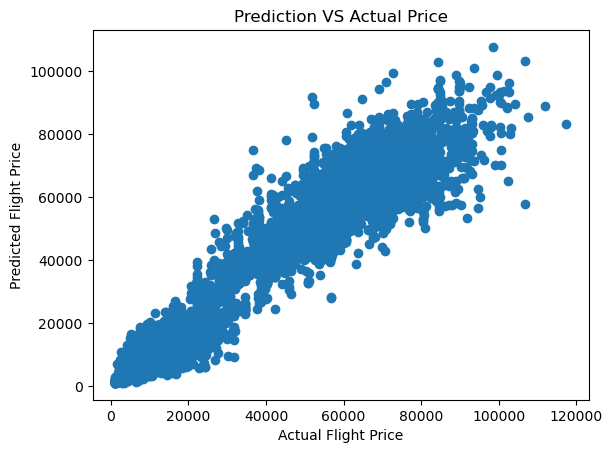

In [30]:
import matplotlib.pyplot as plt

plt.scatter(y_test, y_pred)
plt.xlabel('Actual Flight Price')
plt.ylabel('Predicted Flight Price')
plt.title('Prediction VS Actual Price')

In [31]:
df.price.describe()

count    300153.000000
mean      20889.660523
std       22697.767366
min        1105.000000
25%        4783.000000
50%        7425.000000
75%       42521.000000
max      123071.000000
Name: price, dtype: float64

In [32]:
importances = dict(zip(reg.feature_names_in_, reg.feature_importances_))
sorted_importances = sorted(importances.items(), key=lambda x:x[1], reverse=True)

sorted_importances

[('class', 0.8799842027344958),
 ('duration', 0.057142074711635474),
 ('days_left', 0.018652238086785088),
 ('airline_Air_India', 0.005238585068305217),
 ('airline_Vistara', 0.004832323000583094),
 ('source_Delhi', 0.0038024817997627863),
 ('dest_Delhi', 0.003430910200624748),
 ('source_Mumbai', 0.0023503965838599593),
 ('stops', 0.0018958782022194802),
 ('dest_Kolkata', 0.001873272164953618),
 ('dest_Mumbai', 0.0018675054772594943),
 ('source_Kolkata', 0.0016911009859969202),
 ('dest_Hyderabad', 0.0015591007331717563),
 ('arrival_Evening', 0.001537801577487446),
 ('source_Hyderabad', 0.0012441610797998914),
 ('dest_Bangalore', 0.0012431647238176622),
 ('arrival_Night', 0.0011948274663024553),
 ('departure_Evening', 0.001093983891377644),
 ('source_Bangalore', 0.0010721487965521435),
 ('arrival_Afternoon', 0.0010085093105157705),
 ('source_Chennai', 0.0008713597857624018),
 ('dest_Chennai', 0.0008620008926633245),
 ('departure_Morning', 0.0008358092288880551),
 ('departure_Early_Mornin

In [33]:
df.days_left.describe()

count    300153.000000
mean         26.004751
std          13.561004
min           1.000000
25%          15.000000
50%          26.000000
75%          38.000000
max          49.000000
Name: days_left, dtype: float64

<BarContainer object of 10 artists>

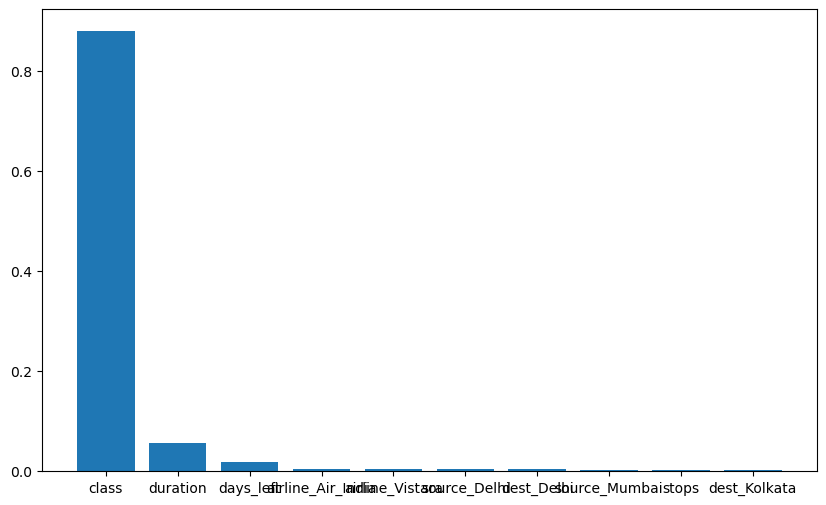

In [34]:
plt.figure(figsize=(10,6))
plt.bar([x[0] for x in sorted_importances[:10]], [x[1] for x in sorted_importances[:10]])

In [35]:
'''
from sklearn.model_selection import GridSearchCV

param_grid = {
    'n_estimators': [100,200,300],
    'max_depth': [None, 10 , 20, 30],
    'min_samples_split': [2,5,10],
    'min_samples_leaf': [1,2,4],
    'max_features': ['auto','sqrt']
}

grid_search = GridSearchCV(reg, param_grid, cv=5)
grid_search.fit(X_train, y_train)

best_params = grid_search.best_params_
'''    

"\nfrom sklearn.model_selection import GridSearchCV\n\nparam_grid = {\n    'n_estimators': [100,200,300],\n    'max_depth': [None, 10 , 20, 30],\n    'min_samples_split': [2,5,10],\n    'min_samples_leaf': [1,2,4],\n    'max_features': ['auto','sqrt']\n}\n\ngrid_search = GridSearchCV(reg, param_grid, cv=5)\ngrid_search.fit(X_train, y_train)\n\nbest_params = grid_search.best_params_\n"

In [36]:
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint

param_dist = {
    'n_estimators': randint(100, 300),
    'max_depth': [None, 10, 20, 30, 40, 50],
    'min_samples_split': randint(2, 11),
    'min_samples_leaf': randint(1, 5),
    'max_features': [1.0, 'sqrt', 'auto']
}

reg = RandomForestRegressor(n_jobs=-1)

random_search = RandomizedSearchCV(estimator=reg, param_distributions=param_dist, n_iter = 2, cv = 3, scoring='neg_mean_squared_error', verbose=2, random_state=10,n_jobs=-1)
random_search.fit(X_train, y_train)

best_regressor = random_search.best_estimator_ 

Fitting 3 folds for each of 2 candidates, totalling 6 fits


In [37]:
best_regressor.score(X_test,y_test)

0.9863205674961364

In [38]:
import math
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

y_pred = best_regressor.predict(X_test) 
print ('R2: ',r2_score(y_test,y_pred))
print ('MAE: ',mean_absolute_error(y_test,y_pred))
print ('MSE: ',mean_squared_error(y_test,y_pred))
print ('RMSE: ',math.sqrt(mean_squared_error(y_test,y_pred)))

R2:  0.9863205674961364
MAE:  1086.2237121380301
MSE:  7052033.64559947
RMSE:  2655.5665394788116


Text(0.5, 1.0, 'Prediction VS Actual Price')

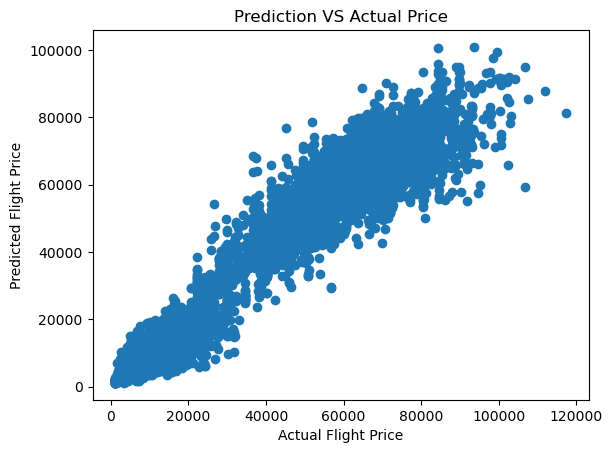

In [39]:
import matplotlib.pyplot as plt

plt.scatter(y_test, y_pred)
plt.xlabel('Actual Flight Price')
plt.ylabel('Predicted Flight Price')
plt.title('Prediction VS Actual Price')